In [5]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
import os

import torchvision
from torchvision import datasets, models, transforms
from torchvision.models.resnet import ResNet18_Weights

import numpy as np
import time

import torch
import torch.nn.functional as F

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

# 모델 매개변수 로드
model_parameters = torch.load('./drive/MyDrive/resnet18_test2.pth')

# 새로운 모델 생성 => resnet18로 학습되었으므로, 기반 모델로 18로
model = torchvision.models.resnet18()

# 마지막 층의 출력 뉴런 수 변경 => 512는 resnet18의 마지막 레이어의 번호를 의미(마지막 레이어에서 뉴런 3개 이용?한것이므로)
model.fc = nn.Linear(512, 3) # 3은 학습한 객체를 의미

# 모델 매개변수 로드
model.load_state_dict(model_parameters)

# 모델을 평가 모드로 설정
model.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
# 데이터셋을 불러올 때 사용할 변형(transformation) 객체 정의
transforms_train = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(), # 데이터 증진(augmentation)
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]) # 정규화(normalization)
])

transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

In [8]:
def imshow(input, title):
    # torch.Tensor를 numpy 객체로 변환
    input = input.numpy().transpose((1, 2, 0))
    # 이미지 정규화 해제하기
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    # 이미지 출력
    plt.imshow(input)
    plt.title(title)
    plt.show()

['test_pill.jpg', 'test2.png', 'Timing_test1.png', 'Timing_test2.png', 'Timing_test3.png', 'Myambutol_test1.png', 'Myambutol_test2.png', 'tilenole.png', 'm_test2.png', 'm_test1.png', 't_test1.png', 't_test3.png']


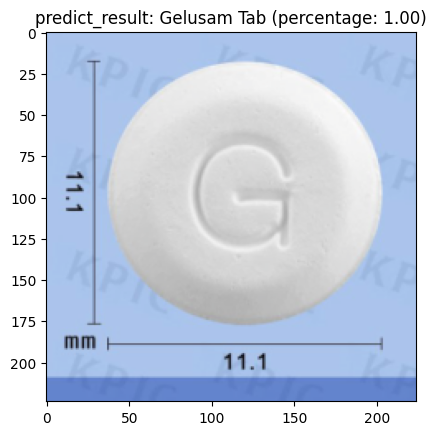

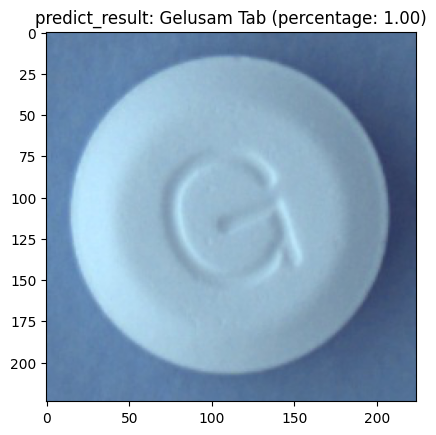

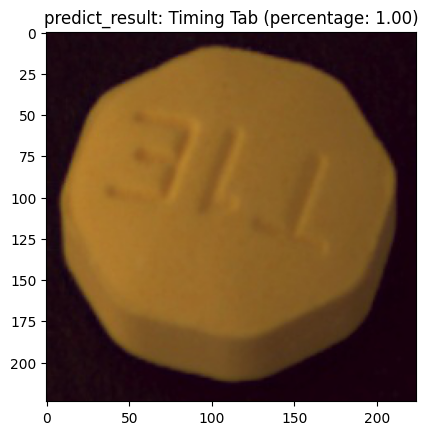

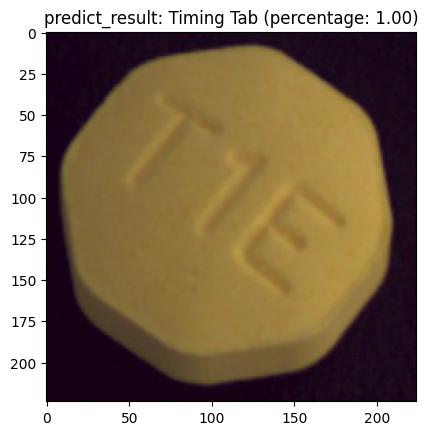

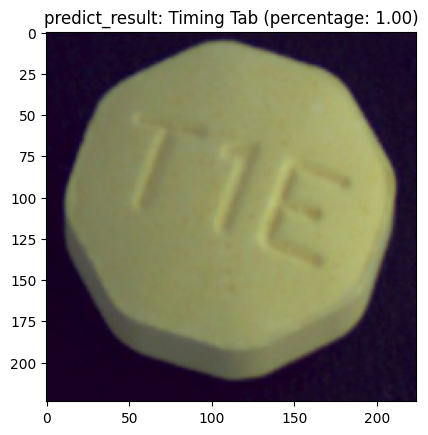

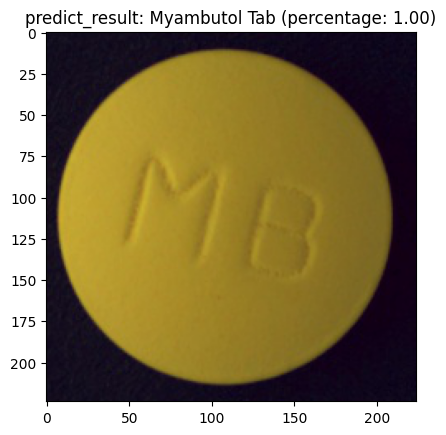

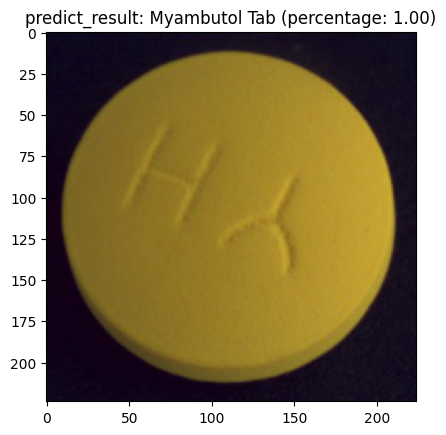

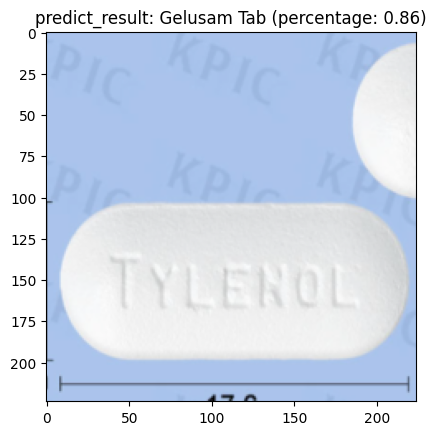

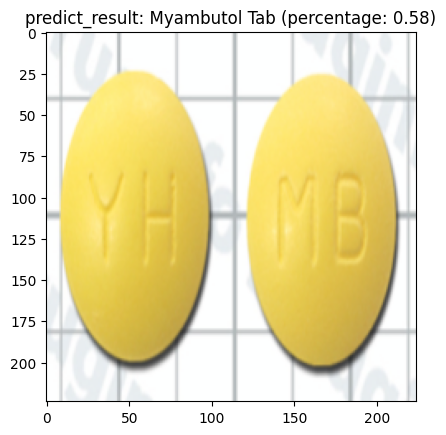

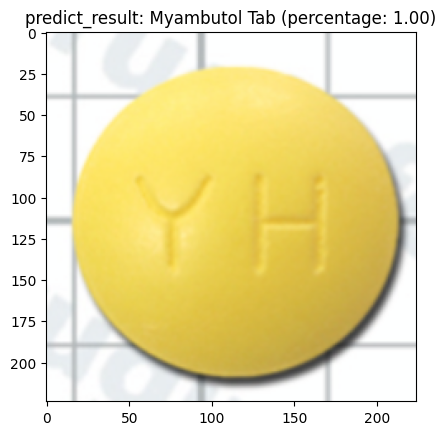

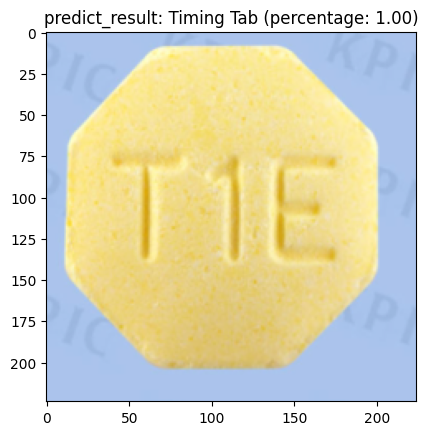

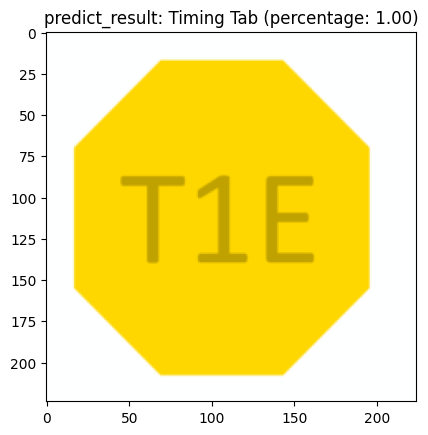

In [9]:
# 모델 정확도 검증
from PIL import Image
import torch.nn.functional as F


# model_test_images에 저장한 이미지들의 이름을 불러온다
folder_dir = r'./drive/MyDrive/model_test_images'
image_lists = os.listdir(folder_dir)

print(image_lists)

class_names = ['Gelusam Tab', 'Myambutol Tab', 'Timing Tab']


# 불러온 이미지 수만큼 모델로 테스트하여 정확도를 검정한다.
for i in range(len(image_lists)):
  image = Image.open('./drive/MyDrive/model_test_images/' + image_lists[i])
  image = transforms_test(image).unsqueeze(0).to(device)
  model.to(device)  # 모델을 동일한 디바이스로 이동시킴

  with torch.no_grad():
      outputs = model(image)
      probabilities = F.softmax(outputs, dim=1)  # 예측 결과를 확률로 변환
      _, preds = torch.max(outputs, 1)
      predicted_class = class_names[preds[0]]
      predicted_prob = probabilities[0, preds[0]].item()  # 예측된 클래스의 확률 값

  imshow(image.cpu().data[0], title=f'predict_result: {predicted_class} (percentage: {predicted_prob:.2f})')